In [59]:
import datacube
%matplotlib inline
from datetime import datetime
import matplotlib
from datacube.storage import masking
from madmex.util.xarray import to_float

In [60]:
dc = datacube.Datacube()

In [61]:
name_of_product = 'ls8_espa_mexico'
x = (-103.8, -103.7)
y = (20.75, 20.85)

In [62]:
ds = dc.load(name_of_product, time=(datetime(2017, 4, 1), datetime(2017, 5, 1)),x=x,y=y)

In [63]:
ds

<xarray.Dataset>
Dimensions:   (time: 6, x: 351, y: 375)
Coordinates:
  * time      (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
  * y         (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
  * x         (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Data variables:
    blue      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    green     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    red       (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir       (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir1     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir2     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    pixel_qa  (time, y, x) int16 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [64]:
ds.nir

<xarray.DataArray 'nir' (time: 6, y: 375, x: 351)>
array([[[-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999],
        ...,
        [-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999]],

       [[ 2601,  2598, ...,  2539,  2271],
        [ 2652,  2668, ...,  1767,  1734],
        ...,
        [ 2154,  2075, ...,  2206,  2350],
        [ 2268,  2154, ...,  2319,  2292]],

       ...,

       [[ 2710,  2656, ...,  2522,  2346],
        [ 2752,  2757, ...,  1828,  1808],
        ...,
        [ 2134,  2102, ...,  2238,  2392],
        [ 2302,  2170, ...,  2381,  2330]],

       [[-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999],
        ...,
        [-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 

(array([526500.,      0.,      0.,      0.,      0.,      0.,   1173.,
        166118.,  95355.,    604.]),
 array([-9999. , -8430.3, -6861.6, -5292.9, -3724.2, -2155.5,  -586.8,
          981.9,  2550.6,  4119.3,  5688. ]),
 <a list of 10 Patch objects>)

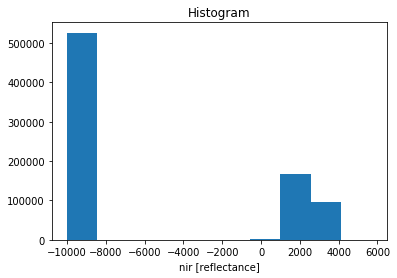

In [65]:
ds.nir.plot()

In [66]:
clear = masking.make_mask(ds.pixel_qa, cloud=False, cloud_shadow=False, snow=False, clear=True)

In [67]:
ds_1 = ds.where(clear)

In [68]:
ds_1 = ds.drop('pixel_qa')

In [69]:
ds_1

<xarray.Dataset>
Dimensions:  (time: 6, x: 351, y: 375)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Data variables:
    blue     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    green    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    red      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir1    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir2    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [70]:
ds_1.time

<xarray.DataArray 'time' (time: 6)>
array(['2017-04-02T17:17:19.190333000', '2017-04-02T17:17:43.089843000',
       '2017-04-09T17:23:26.615451000', '2017-04-18T17:17:10.485195000',
       '2017-04-18T17:17:34.384704000', '2017-04-25T17:23:16.370213000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [71]:
ds_1 = ds_1.apply(func=to_float, keep_attrs=True)

In [72]:
ds_1['ndvi'] = ((ds_1.nir - ds_1.red) / (ds_1.nir + ds_1.red)) * 10000
ds_1['ndvi'].attrs['nodata'] = -9999

In [73]:
ds_1.ndvi

<xarray.DataArray 'ndvi' (time: 6, y: 375, x: 351)>
array([[[        nan,         nan, ...,         nan,         nan],
        [        nan,         nan, ...,         nan,         nan],
        ...,
        [        nan,         nan, ...,         nan,         nan],
        [        nan,         nan, ...,         nan,         nan]],

       [[2234.242709, 2223.006351, ..., 3650.537634, 3382.439599],
        [2027.210884, 2028.854824, ..., 2443.661972, 2368.045649],
        ...,
        [4260.178749, 4295.556321, ..., 2566.22045 , 2460.233298],
        [4363.521216, 4312.292359, ..., 2467.741935, 2589.947817]],

       ...,

       [[2177.038868, 2130.62343 , ..., 3242.320819, 3113.471213],
        [1965.217391, 1979.144036, ..., 2297.342751, 2261.783655],
        ...,
        [3661.971831, 3815.313835, ..., 2464.49457 , 2442.13264 ],
        [3838.292756, 3682.21942 , ..., 2426.931106, 2479.914301]],

       [[        nan,         nan, ...,         nan,         nan],
        [        na

In [74]:
ds_1.ndvi.x

<xarray.DataArray 'x' (x: 351)>
array([2313435., 2313465., 2313495., ..., 2323875., 2323905., 2323935.])
Coordinates:
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Attributes:
    units:    degree

In [75]:
ds_1.ndvi.time

<xarray.DataArray 'time' (time: 6)>
array(['2017-04-02T17:17:19.190333000', '2017-04-02T17:17:43.089843000',
       '2017-04-09T17:23:26.615451000', '2017-04-18T17:17:10.485195000',
       '2017-04-18T17:17:34.384704000', '2017-04-25T17:23:16.370213000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [76]:
ds_1.ndvi.attrs

OrderedDict([('nodata', -9999)])

(array([5.00000e+00, 6.70000e+02, 1.25530e+04, 1.08212e+05, 1.08889e+05,
        2.69840e+04, 5.29400e+03, 5.74000e+02, 5.60000e+01, 1.30000e+01]),
 array([-1289.91060026,  -273.04075235,   743.82909555,  1760.69894346,
         2777.56879136,  3794.43863927,  4811.30848717,  5828.17833507,
         6845.04818298,  7861.91803088,  8878.78787879]),
 <a list of 10 Patch objects>)

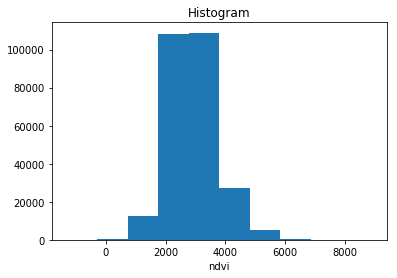

In [77]:
ds_1.ndvi.plot()

In [84]:
ds_mean = ds_1.mean('time', keep_attrs=True, skipna=True)

In [85]:
ds_mean

<xarray.Dataset>
Dimensions:  (x: 351, y: 375)
Coordinates:
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Data variables:
    blue     (y, x) float64 865.0 853.0 871.0 845.0 ... 764.5 778.0 753.0 760.5
    green    (y, x) float64 1.24e+03 1.237e+03 1.259e+03 ... 1.073e+03 1.046e+03
    red      (y, x) float64 1.696e+03 1.688e+03 1.74e+03 ... 1.426e+03 1.376e+03
    nir      (y, x) float64 2.656e+03 2.627e+03 2.675e+03 ... 2.35e+03 2.311e+03
    swir1    (y, x) float64 2.97e+03 2.914e+03 2.959e+03 ... 2.747e+03 2.803e+03
    swir2    (y, x) float64 2.36e+03 2.316e+03 2.304e+03 ... 2.113e+03 2.17e+03
    ndvi     (y, x) float64 2.206e+03 2.177e+03 2.12e+03 ... 2.447e+03 2.535e+03
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [86]:
ds_mean.rename({'blue': 'blue_mean',
                'green': 'green_mean',
                'red': 'red_mean',
                'nir': 'nir_mean',
                'swir1': 'swir1_mean',
                'swir2': 'swir2_mean',
                'ndvi': 'ndvi_mean'}, inplace=True)

<xarray.Dataset>
Dimensions:     (x: 351, y: 375)
Coordinates:
  * y           (y) float64 9.894e+05 9.894e+05 ... 9.782e+05 9.782e+05
  * x           (x) float64 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Data variables:
    blue_mean   (y, x) float64 865.0 853.0 871.0 845.0 ... 778.0 753.0 760.5
    green_mean  (y, x) float64 1.24e+03 1.237e+03 ... 1.073e+03 1.046e+03
    red_mean    (y, x) float64 1.696e+03 1.688e+03 ... 1.426e+03 1.376e+03
    nir_mean    (y, x) float64 2.656e+03 2.627e+03 ... 2.35e+03 2.311e+03
    swir1_mean  (y, x) float64 2.97e+03 2.914e+03 ... 2.747e+03 2.803e+03
    swir2_mean  (y, x) float64 2.36e+03 2.316e+03 ... 2.113e+03 2.17e+03
    ndvi_mean   (y, x) float64 2.206e+03 2.177e+03 ... 2.447e+03 2.535e+03
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [87]:
ds_mean

<xarray.Dataset>
Dimensions:     (x: 351, y: 375)
Coordinates:
  * y           (y) float64 9.894e+05 9.894e+05 ... 9.782e+05 9.782e+05
  * x           (x) float64 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Data variables:
    blue_mean   (y, x) float64 865.0 853.0 871.0 845.0 ... 778.0 753.0 760.5
    green_mean  (y, x) float64 1.24e+03 1.237e+03 ... 1.073e+03 1.046e+03
    red_mean    (y, x) float64 1.696e+03 1.688e+03 ... 1.426e+03 1.376e+03
    nir_mean    (y, x) float64 2.656e+03 2.627e+03 ... 2.35e+03 2.311e+03
    swir1_mean  (y, x) float64 2.97e+03 2.914e+03 ... 2.747e+03 2.803e+03
    swir2_mean  (y, x) float64 2.36e+03 2.316e+03 ... 2.113e+03 2.17e+03
    ndvi_mean   (y, x) float64 2.206e+03 2.177e+03 ... 2.447e+03 2.535e+03
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [88]:
ds_mean.ndvi_mean

<xarray.DataArray 'ndvi_mean' (y: 375, x: 351)>
array([[2205.640788, 2176.814891, 2119.929298, ..., 3069.258301, 3446.429227,
        3247.955406],
       [1996.214138, 2003.99943 , 1965.350512, ..., 3094.059189, 2370.502362,
        2314.914652],
       [1883.910005, 1946.83496 , 1981.733804, ..., 2737.770406, 2314.38809 ,
        2294.762222],
       ...,
       [3956.048562, 3872.315185, 4589.270182, ..., 2483.340279, 2286.790902,
        2204.558367],
       [3961.07529 , 4055.435078, 4702.236576, ..., 2605.792264, 2515.35751 ,
        2451.182969],
       [4100.906986, 3997.255889, 4340.713814, ..., 2440.612911, 2447.336521,
        2534.931059]])
Coordinates:
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Attributes:
    nodata:   -9999

In [90]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

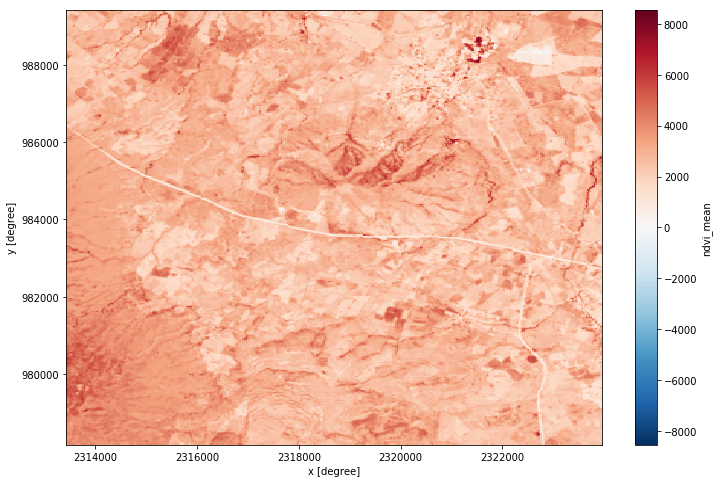

In [91]:
ds_mean.ndvi_mean.plot()

In [92]:
ndvi = (ds.nir - ds.red) / (ds.nir + ds.red)

In [93]:
ndvi

<xarray.DataArray (time: 6, y: 375, x: 351)>
array([[[-0.      , -0.      , ..., -0.      , -0.      ],
        [-0.      , -0.      , ..., -0.      , -0.      ],
        ...,
        [-0.      , -0.      , ..., -0.      , -0.      ],
        [-0.      , -0.      , ..., -0.      , -0.      ]],

       [[ 0.223424,  0.222301, ...,  0.365054,  0.338244],
        [ 0.202721,  0.202885, ...,  0.244366,  0.236805],
        ...,
        [ 0.426018,  0.429556, ...,  0.256622,  0.246023],
        [ 0.436352,  0.431229, ...,  0.246774,  0.258995]],

       ...,

       [[ 0.217704,  0.213062, ...,  0.324232,  0.311347],
        [ 0.196522,  0.197914, ...,  0.229734,  0.226178],
        ...,
        [ 0.366197,  0.381531, ...,  0.246449,  0.244213],
        [ 0.383829,  0.368222, ...,  0.242693,  0.247991]],

       [[-0.      , -0.      , ..., -0.      , -0.      ],
        [-0.      , -0.      , ..., -0.      , -0.      ],
        ...,
        [-0.      , -0.      , ..., -0.      , -0.      ],

In [94]:
ndvi.x

<xarray.DataArray 'x' (x: 351)>
array([2313435., 2313465., 2313495., ..., 2323875., 2323905., 2323935.])
Coordinates:
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06
Attributes:
    units:    degree

In [95]:
ndvi.time

<xarray.DataArray 'time' (time: 6)>
array(['2017-04-02T17:17:19.190333000', '2017-04-02T17:17:43.089843000',
       '2017-04-09T17:23:26.615451000', '2017-04-18T17:17:10.485195000',
       '2017-04-18T17:17:34.384704000', '2017-04-25T17:23:16.370213000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02T17:17:19.190333 ... 2017-04-25T17:23:16.370213
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [96]:
ndvi.time.attrs

OrderedDict([('units', 'seconds since 1970-01-01 00:00:00')])

(array([5.00000e+00, 5.27170e+05, 1.25530e+04, 1.08212e+05, 1.08889e+05,
        2.69840e+04, 5.29400e+03, 5.74000e+02, 5.60000e+01, 1.30000e+01]),
 array([-0.12899106, -0.02730408,  0.07438291,  0.17606989,  0.27775688,
         0.37944386,  0.48113085,  0.58281783,  0.68450482,  0.7861918 ,
         0.88787879]),
 <a list of 10 Patch objects>)

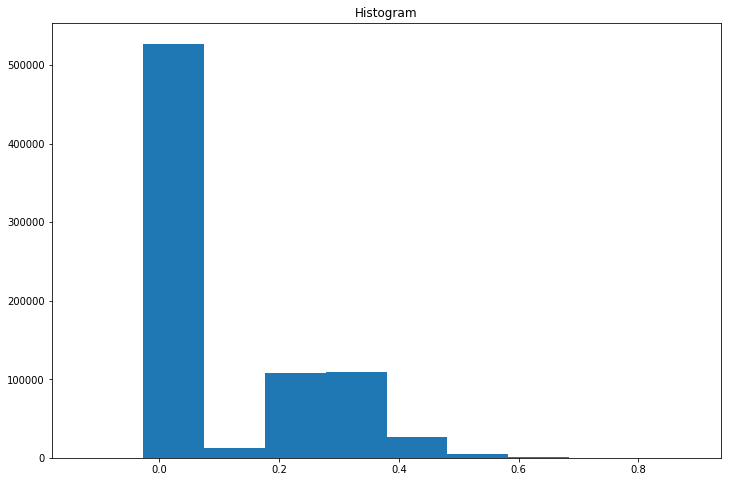

In [97]:
ndvi.plot()

In [98]:
ndvi_mean = ndvi.mean()

In [99]:
ndvi_mean

<xarray.DataArray ()>
array(0.097387)

In [100]:
ndvi_mean = ndvi.mean('time', keep_attrs=True, skipna=True)

In [101]:
ndvi_mean

<xarray.DataArray (y: 375, x: 351)>
array([[0.073521, 0.07256 , 0.070664, ..., 0.102309, 0.114881, 0.108265],
       [0.06654 , 0.0668  , 0.065512, ..., 0.103135, 0.079017, 0.077164],
       [0.062797, 0.064894, 0.066058, ..., 0.091259, 0.077146, 0.076492],
       ...,
       [0.131868, 0.129077, 0.152976, ..., 0.082778, 0.076226, 0.073485],
       [0.132036, 0.135181, 0.156741, ..., 0.08686 , 0.083845, 0.081706],
       [0.136697, 0.133242, 0.14469 , ..., 0.081354, 0.081578, 0.084498]])
Coordinates:
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
  * x        (x) float64 2.313e+06 2.313e+06 2.313e+06 ... 2.324e+06 2.324e+06

In [103]:
ndvi_mean.y

<xarray.DataArray 'y' (y: 375)>
array([989405., 989375., 989345., ..., 978245., 978215., 978185.])
Coordinates:
  * y        (y) float64 9.894e+05 9.894e+05 9.893e+05 ... 9.782e+05 9.782e+05
Attributes:
    units:    degree

In [104]:
ndvi_mean.y.attrs

OrderedDict([('units', 'degree')])

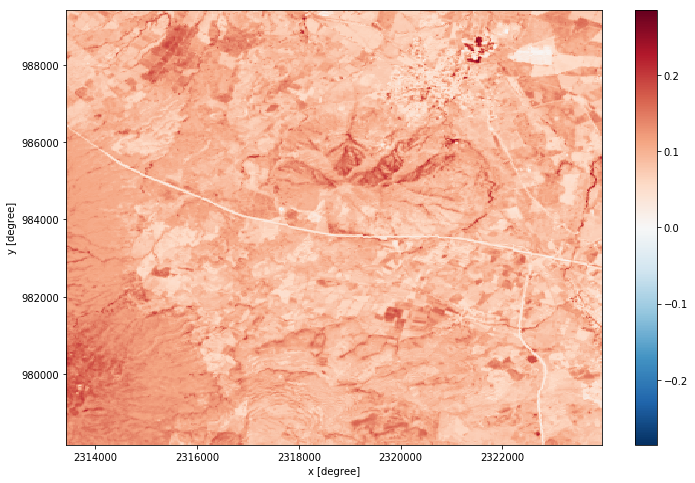

In [105]:
ndvi_mean.plot()